# Galois Theory and Data Symmetry

The purpose of this document is to create a dataset of polynomials and their Galois groups. Perhaps this is too ambitious, and I might replace the Galois group with just the size of the group. The Galois group is the group of symmetries of the roots of the polynomials (assuming that the splitting field is Galois of course). By definition $\mathbb{C}$ is algebraically closed over the rational numbers, so any polynomial with rational coefficients will split in $\mathbb{C}$. Thus we let our polynomial ring be over the complex numbers, while also checking that the polynomial is irreducible over the rationals.

In [155]:
from matplotlib import pyplot as plt

In [156]:
z = PolynomialRing(ComplexField(), 'z').gen()
x = PolynomialRing(RationalField(), 'x').gen()

In [70]:
q = z^4 + z + 1
p = x^4 + x + 1

The second entry on each tuple of the roots represents the multiplicity of the root. Given that we are working over the rational numbers, any irreducible polynomial will have distinct roots, and thus we don't have to worry about multiplicity. I.e. the multiplicity will always be one.

In [71]:
print(p.is_irreducible())
print(q.roots())

True
[(-0.727136084491197 - 0.430014288329716*I, 1), (-0.727136084491197 + 0.430014288329716*I, 1), (0.727136084491197 - 0.934099289460529*I, 1), (0.727136084491197 + 0.934099289460529*I, 1)]


To use numpy and matplotlib later on, we need to process the data a little bit.

In [72]:
def data_inputs(polynomial):
    vectorized_roots = []
    norm_of_roots = []
    for root in polynomial.roots():
        vectorized_roots.append([root[0].real(), root[0].imag()])
        norm_of_roots.append(root[0].abs())
    return (vectorized_roots)

In [73]:
print(data_inputs(q))

[[-0.727136084491197, -0.430014288329716], [-0.727136084491197, 0.430014288329716], [0.727136084491197, -0.934099289460529], [0.727136084491197, 0.934099289460529]]


Pyplot settings:

In [74]:
def plot_roots(list_of_roots):
    plt.rcParams["figure.figsize"] = [7.00, 3.50]
    plt.rcParams["figure.autolayout"] = True
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.grid()
    x_vals = [x[0] for x in list_of_roots]
    y_vals = [x[1] for x in list_of_roots]
    plt.scatter(x_vals, y_vals)
    plt.show()

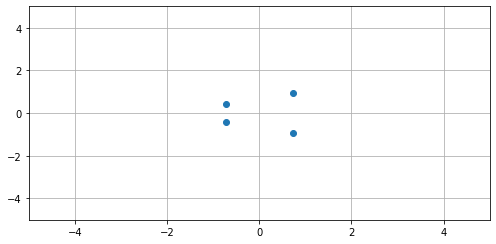

In [75]:
plot_roots(data_inputs(q))

Silly application: Consider a set of points in the real number plane as a set of points in the complex plane. Find an irreducible polynomial whose roots line up with the points.
Maybe not Silly application: Train neural network to find symmetries using galois theory.
Not silly application: Compute Galois groups with Machine learning.

Now we determine the Galois structure:

In [79]:
def galois_group(polynomial):
    K = NumberField(polynomial, 'x')
    return K.galois_group()

In [81]:
galois_group(p)

Galois group 4T5 (S4) with order 24 of x^4 + x + 1

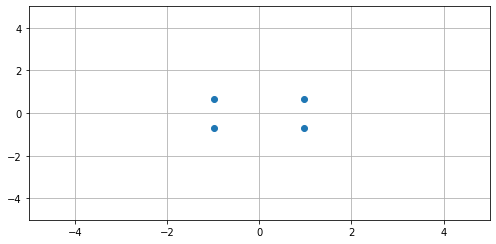

In [96]:
plot_roots(data_inputs(z^4 + 1*z^2 + 2))

In [95]:
galois_group(x^4+ 1*x^2 +2)

Galois group 4T3 (D(4)) with order 8 of x^4 + x^2 + 2

The more regular a shape is, the closer it is to having Galois group 1. On the other hand, the more irregular a shape is, the Galois group is bigger.

To produce a large number of irreducible polynomials in a simple manner, we will use Eisenstein's criterion for irreducibility. It will also be more efficient to define polynomials through a list of coefficients.

In [97]:
def list_to_polynomial(coefficients_list, var):
    polynomial = 0
    deg = len(coefficients_list) - 1
    for coefficient in coefficients_list:
        polynomial += coefficient * var^deg
        deg -= 1
    return polynomial

In [98]:
list_to_polynomial([1,2,2,0,2], x)

x^4 + 2*x^3 + 2*x^2 + 2

Exploration towards profinite groups.

Naturally, if we want to consider continuous shapes, we'd need to take limits of polynomials. For example the circle can be obtained as the limit $\lim x^n-1$ as $n\to\infty$. Our field extension is then the direct limit of fields adjoining primitive $n$th roots of unity. So the Galois group of such an extension is the inverse limit of the Galois groups of each sub-extension. In particular, the Galois group of the circle is trivial as should be.

In the meantime, let's create a bunch of Eisenstein polynomials.

In [150]:
def eisenstein_generator(prime, max_deg):
    base_list = [[1,prime], [1,0]]
    output_list = [[1,prime], [1,0]]
    for number in range(max_deg - 2):
        for polynomial in base_list.copy():
            base_list.remove(polynomial)
            base_list.append(polynomial + [prime])
            base_list.append(polynomial + [0])
            output_list.append(polynomial + [prime])
            output_list.append(polynomial + [0])
    for polynomial in output_list:
        polynomial.append(prime)
    return output_list

In [151]:
eisenstein_generator(3,5)

[[1, 3, 3],
 [1, 0, 3],
 [1, 3, 3, 3],
 [1, 3, 0, 3],
 [1, 0, 3, 3],
 [1, 0, 0, 3],
 [1, 3, 3, 3, 3],
 [1, 3, 3, 0, 3],
 [1, 3, 0, 3, 3],
 [1, 3, 0, 0, 3],
 [1, 0, 3, 3, 3],
 [1, 0, 3, 0, 3],
 [1, 0, 0, 3, 3],
 [1, 0, 0, 0, 3],
 [1, 3, 3, 3, 3, 3],
 [1, 3, 3, 3, 0, 3],
 [1, 3, 3, 0, 3, 3],
 [1, 3, 3, 0, 0, 3],
 [1, 3, 0, 3, 3, 3],
 [1, 3, 0, 3, 0, 3],
 [1, 3, 0, 0, 3, 3],
 [1, 3, 0, 0, 0, 3],
 [1, 0, 3, 3, 3, 3],
 [1, 0, 3, 3, 0, 3],
 [1, 0, 3, 0, 3, 3],
 [1, 0, 3, 0, 0, 3],
 [1, 0, 0, 3, 3, 3],
 [1, 0, 0, 3, 0, 3],
 [1, 0, 0, 0, 3, 3],
 [1, 0, 0, 0, 0, 3]]